# NYC Airbnb Listings Insights: Host Reviews, Price vs. Neighborhood, and Room Availability

**Analyst:** Noah Oyugi

**Email:** [oyuginoah@gmail.com](mailto:oyuginoah@gmail.com)
**LinkedIn:** [Oyugi Noah](https://www.linkedin.com/in/oyuginoah)



**Description:** This Analysis provides valuable insights into three key aspects: Host Reviews, Price vs. Neighborhood, and Room Availability, allowing you to make informed decisions when choosing your accommodation.


In [88]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Set global plotting style and font
plt.style.use('seaborn-v0_8')
plt.rc('font', family='Arial')
sns.despine(left=True, right=True)

plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 300  

plt.rc('axes', titlesize=16)  # Set title font size
plt.rc('axes', labelsize=14)  # Set axis label font size
plt.rc('xtick', labelsize=12)  # Set x-axis tick label font size
plt.rc('ytick', labelsize=12)  # Set y-axis tick label font size

<Figure size 2400x1650 with 0 Axes>

## Load the Data

In [89]:
listings = pd.read_csv(
    'listings.csv'
)
listings = listings[listings['price'] > 0]
listings.head()

,listing_id,host_name,room_type,description,borough,nbhood,last_review,price
0,2595,Jennifer,entire home/apt,Skylit Midtown Castle,Manhattan,Midtown,May 21 2019,225
1,3831,LisaRoxanne,entire home/apt,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,July 05 2019,89
2,5099,Chris,entire home/apt,Large Cozy 1 BR Apartment In Midtown East,Manhattan,Murray Hill,June 22 2019,200
3,5178,Shunichi,private room,Large Furnished Room Near B'way,Manhattan,Hell's Kitchen,June 24 2019,79
4,5238,Ben,entire home/apt,Cute & Cozy Lower East Side 1 bdrm,Manhattan,Chinatown,June 09 2019,150


## Exploratory Data Analysis

### Price Distribution 

In [90]:
listings['price'].describe()

count    23875.000000
mean       119.175916
std         67.193268
min         10.000000
25%         65.000000
50%        100.000000
75%        155.000000
max        333.000000
Name: price, dtype: float64

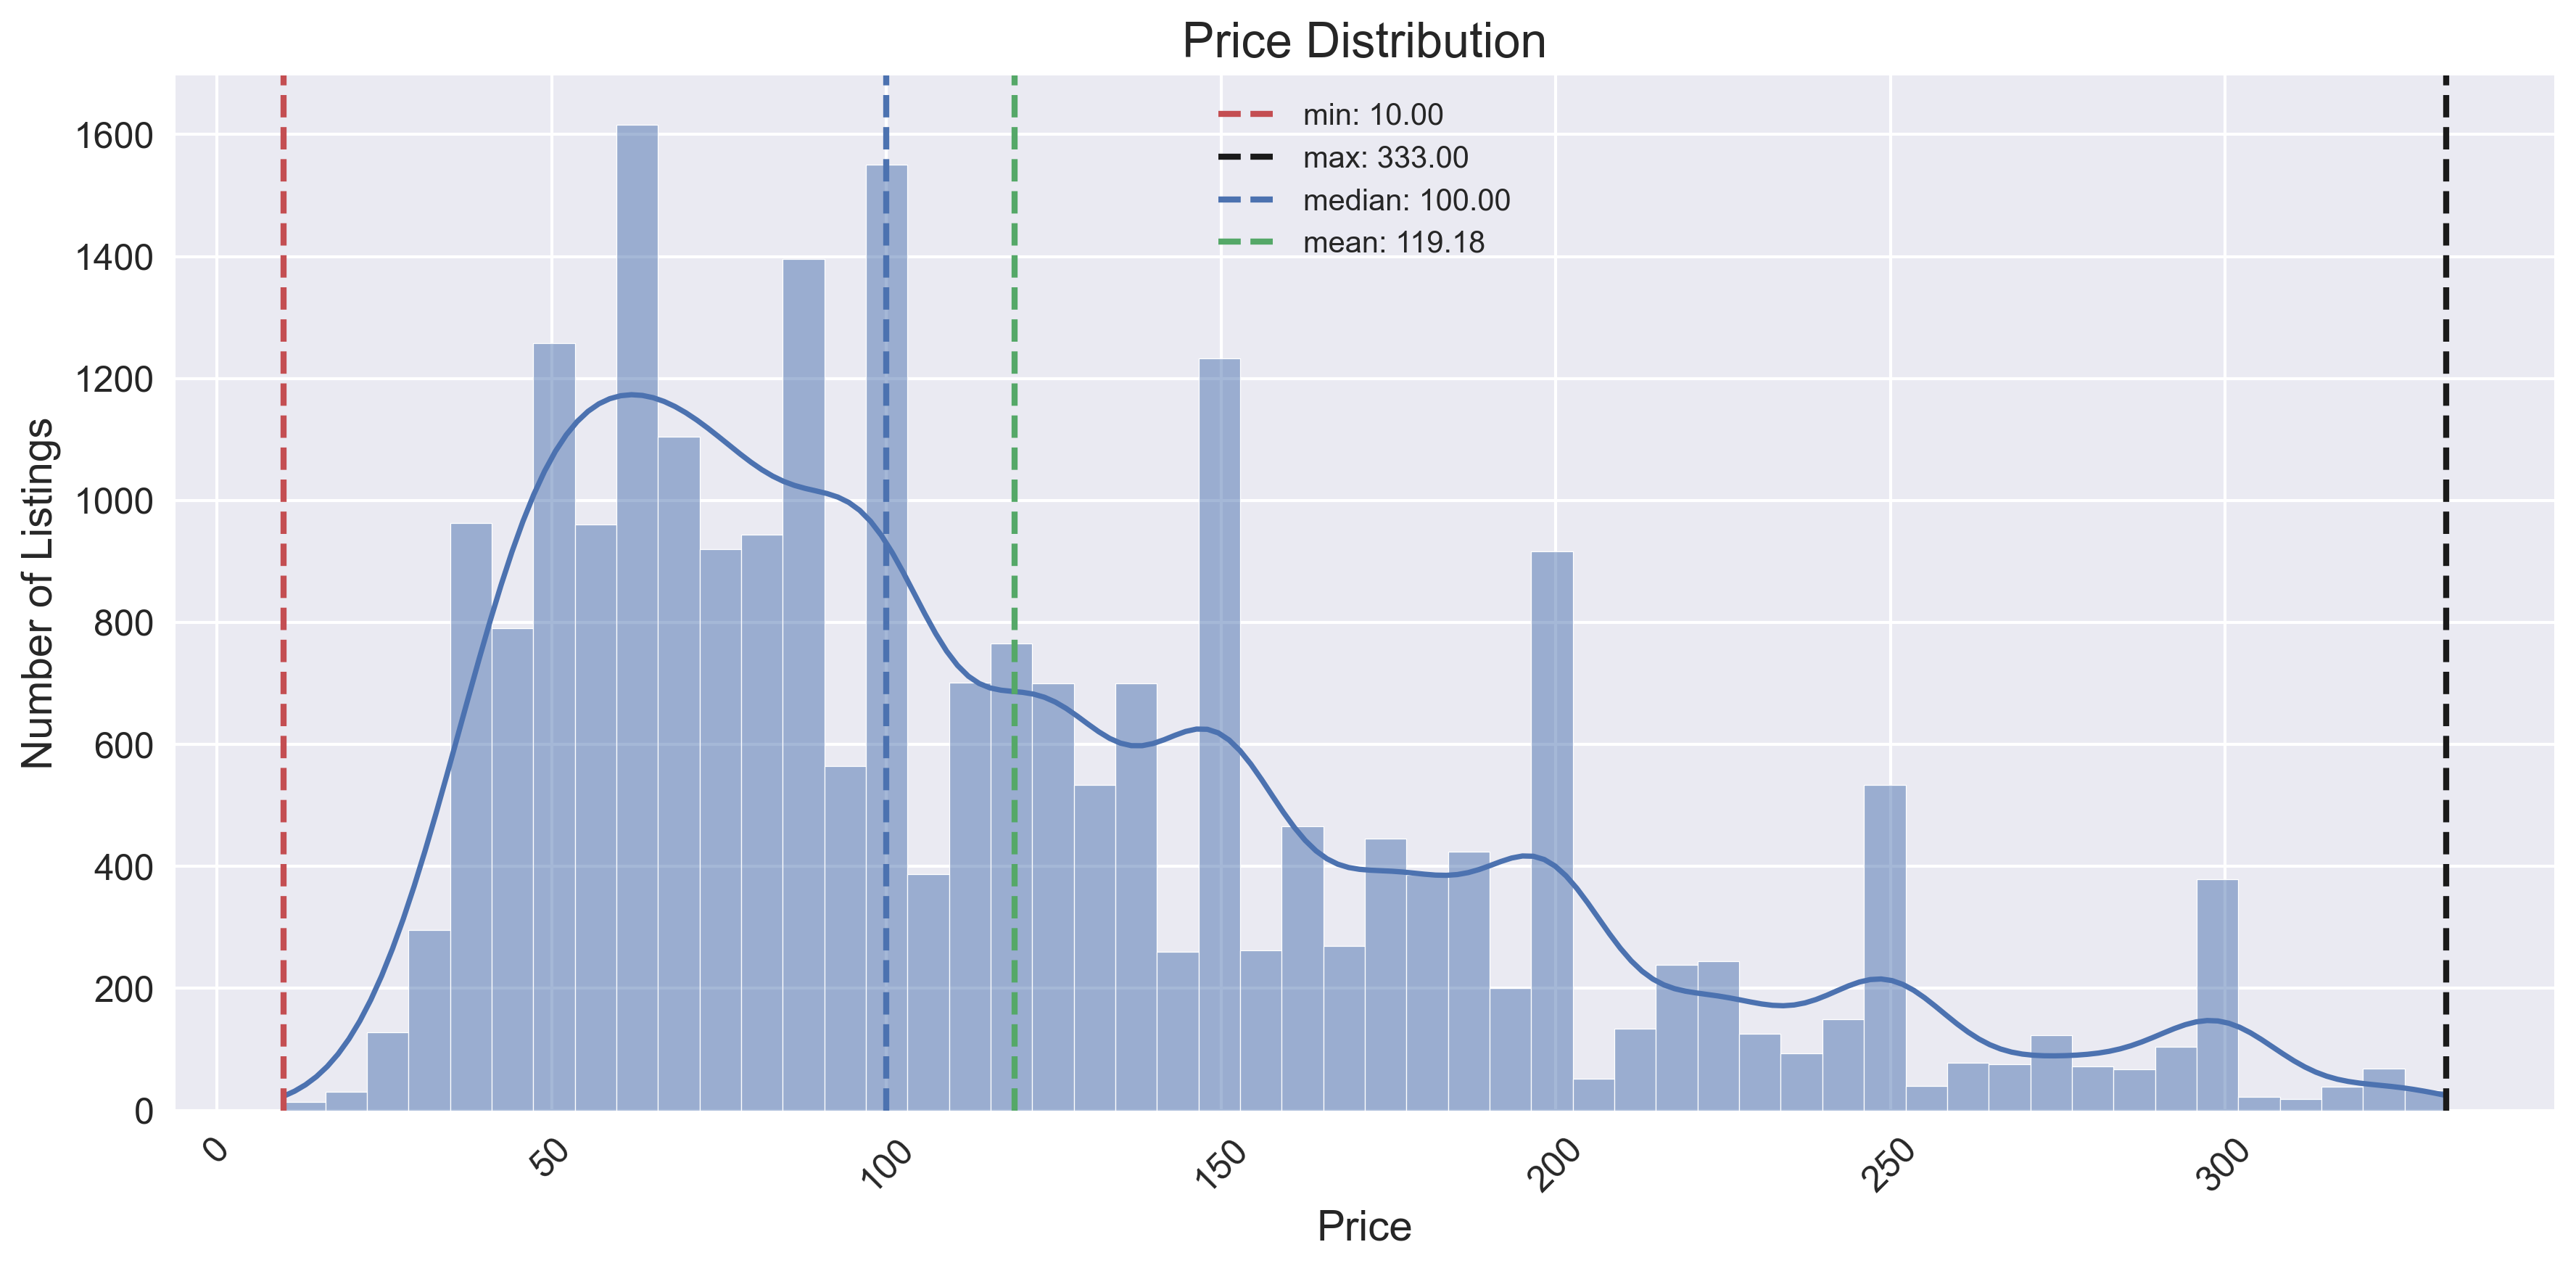

In [91]:
# Calculate statistics 
min_price = listings['price'].min()
max_price = listings['price'].max()
median_price = listings['price'].median()
mean_price = listings['price'].mean()

fig, ax = plt.subplots()
sns.histplot(data=listings[listings['price'] > 0],
             x='price', kde=True)

# Add vertical lines for statistics
ax.axvline(min_price, color='r', linestyle='--',
           linewidth=2, label=f'min: {min_price:.2f}')
ax.axvline(max_price, color='k', linestyle='--',
           linewidth=2, label=f'max: {max_price:.2f}')
ax.axvline(median_price, color='b', linestyle='--',
           linewidth=2, label=f'median: {median_price:.2f}')
ax.axvline(mean_price, color='g', linestyle='--',
           linewidth=2, label=f'mean: {mean_price:.2f}')

plt.legend()
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)

plt.tight_layout();

## Number of Listings per room type

C:\Users\USER\AppData\Local\Temp\ipykernel_2948\2541082681.py:4: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  ax = sns.barplot(x=data.index, y=data, hue=data.index, palette=colors)


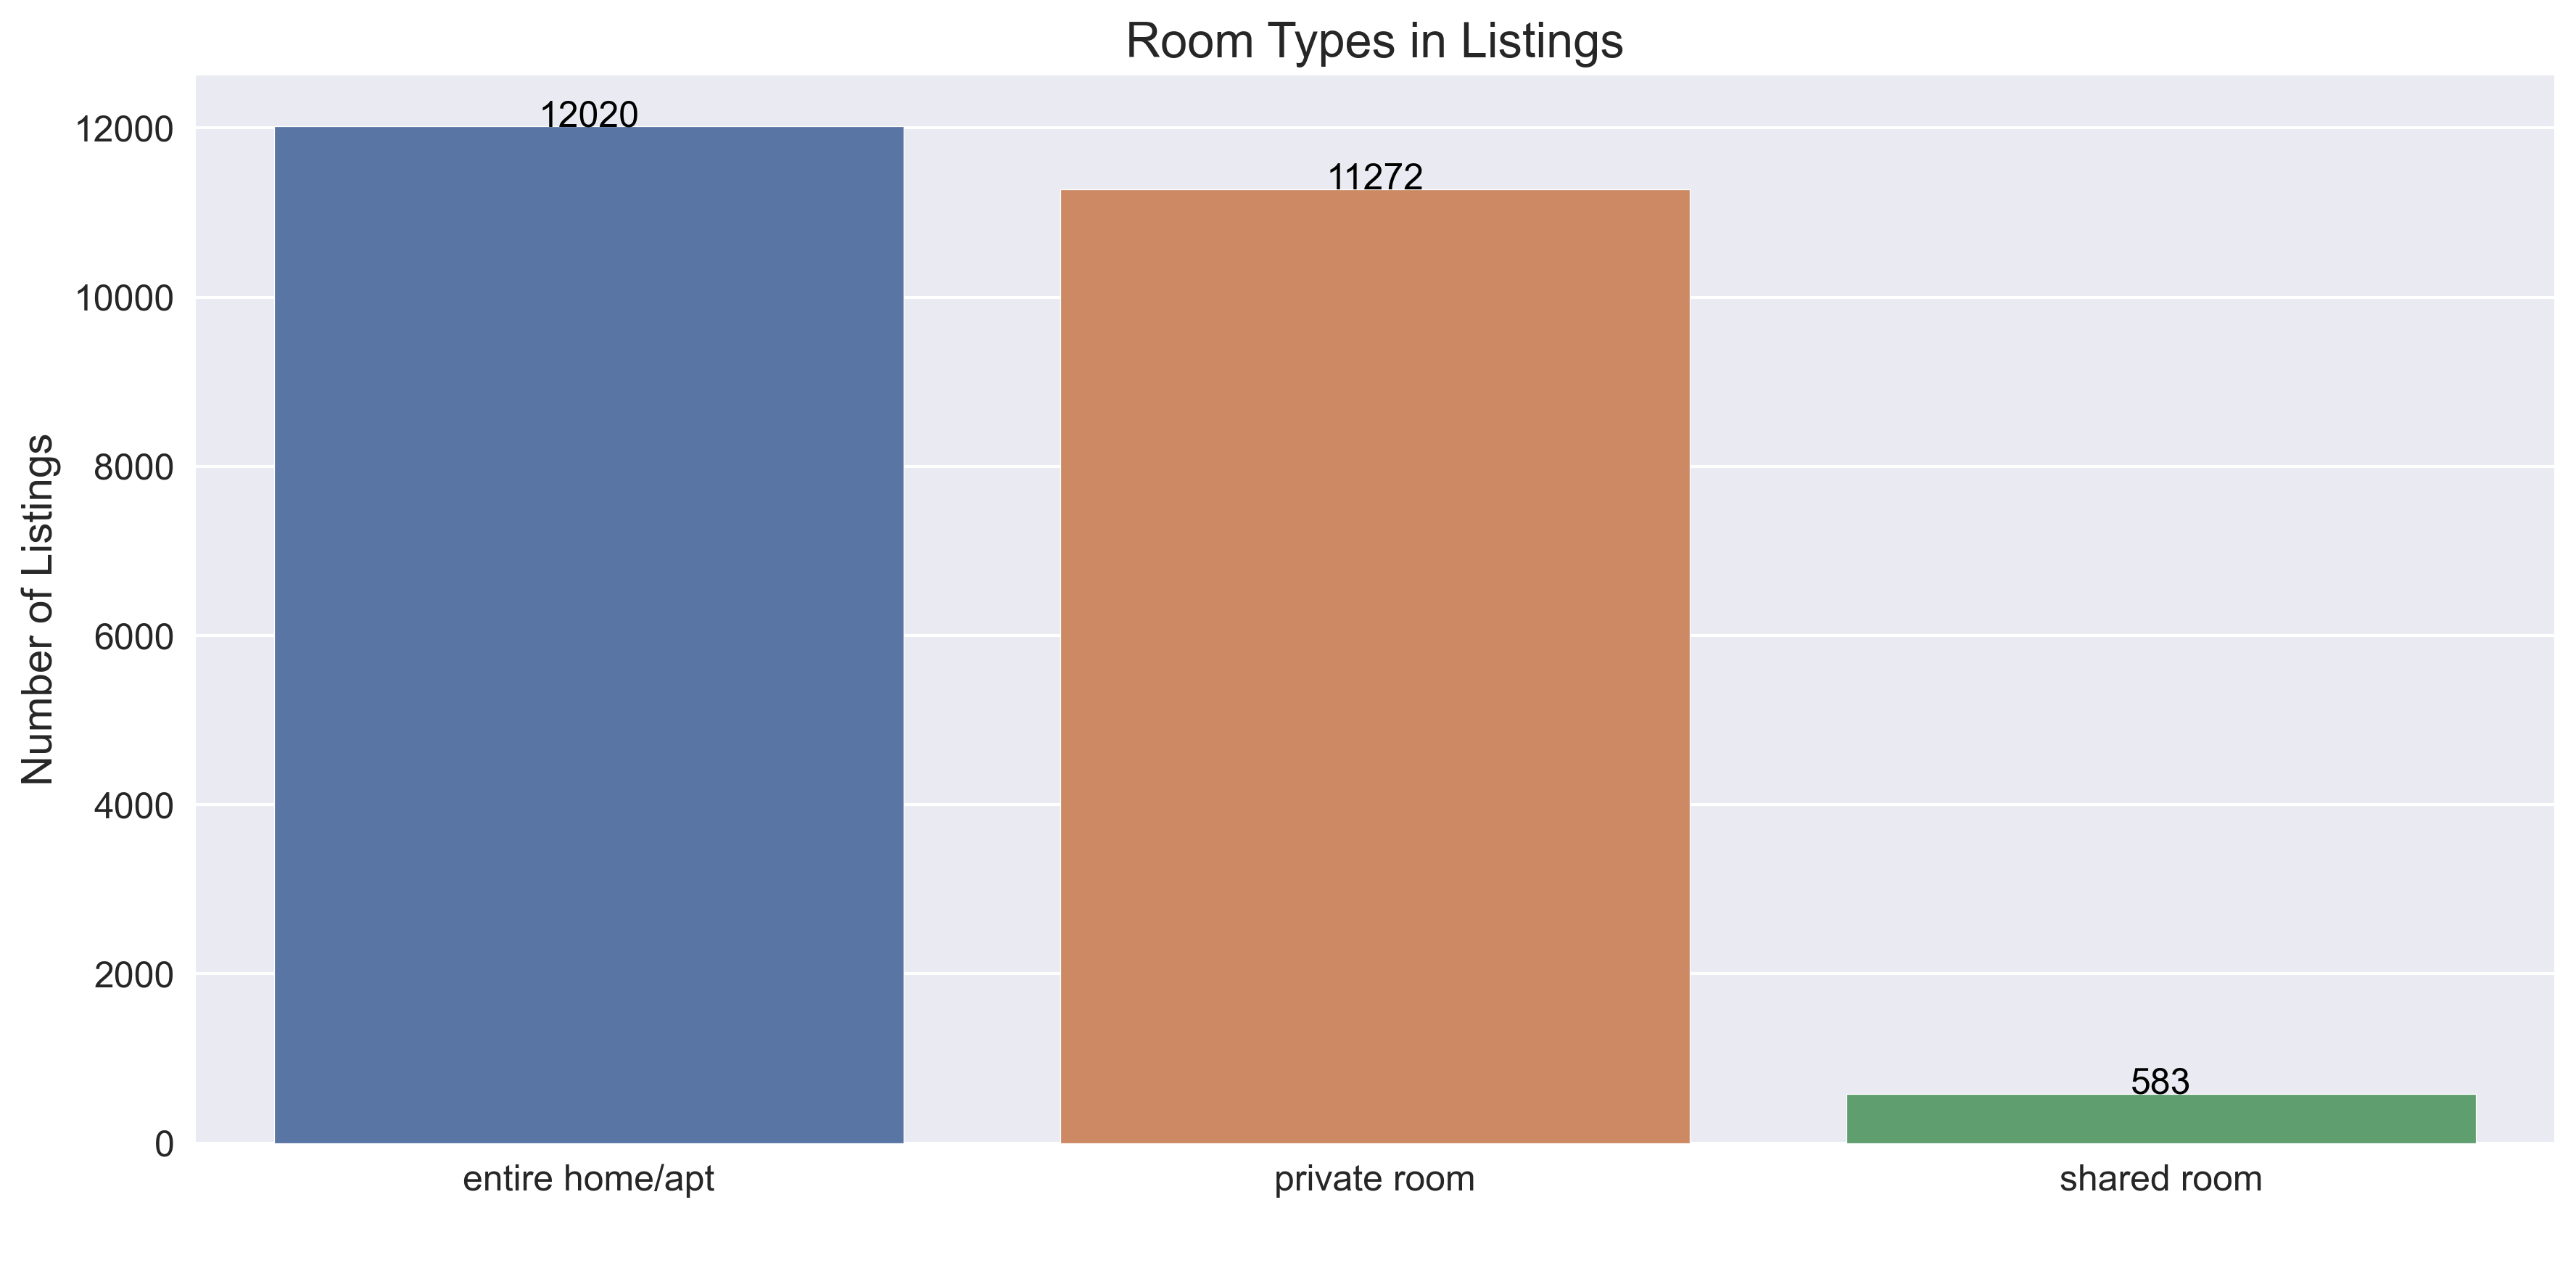

In [92]:
data = listings.room_type.value_counts()
colors = sns.color_palette("deep")

ax = sns.barplot(x=data.index, y=data, hue=data.index, palette=colors)
plt.title('Room Types in Listings')
plt.xlabel(' ')
plt.ylabel('Number of Listings')

for i, v in enumerate(data):
    ax.text(i, v, str(v), color='black', ha='center')

plt.tight_layout();

## Number of Listings per Borough

C:\Users\USER\AppData\Local\Temp\ipykernel_2948\423072560.py:4: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  ax = sns.barplot(x=data.index, y=data, hue=data.index, palette=colors)


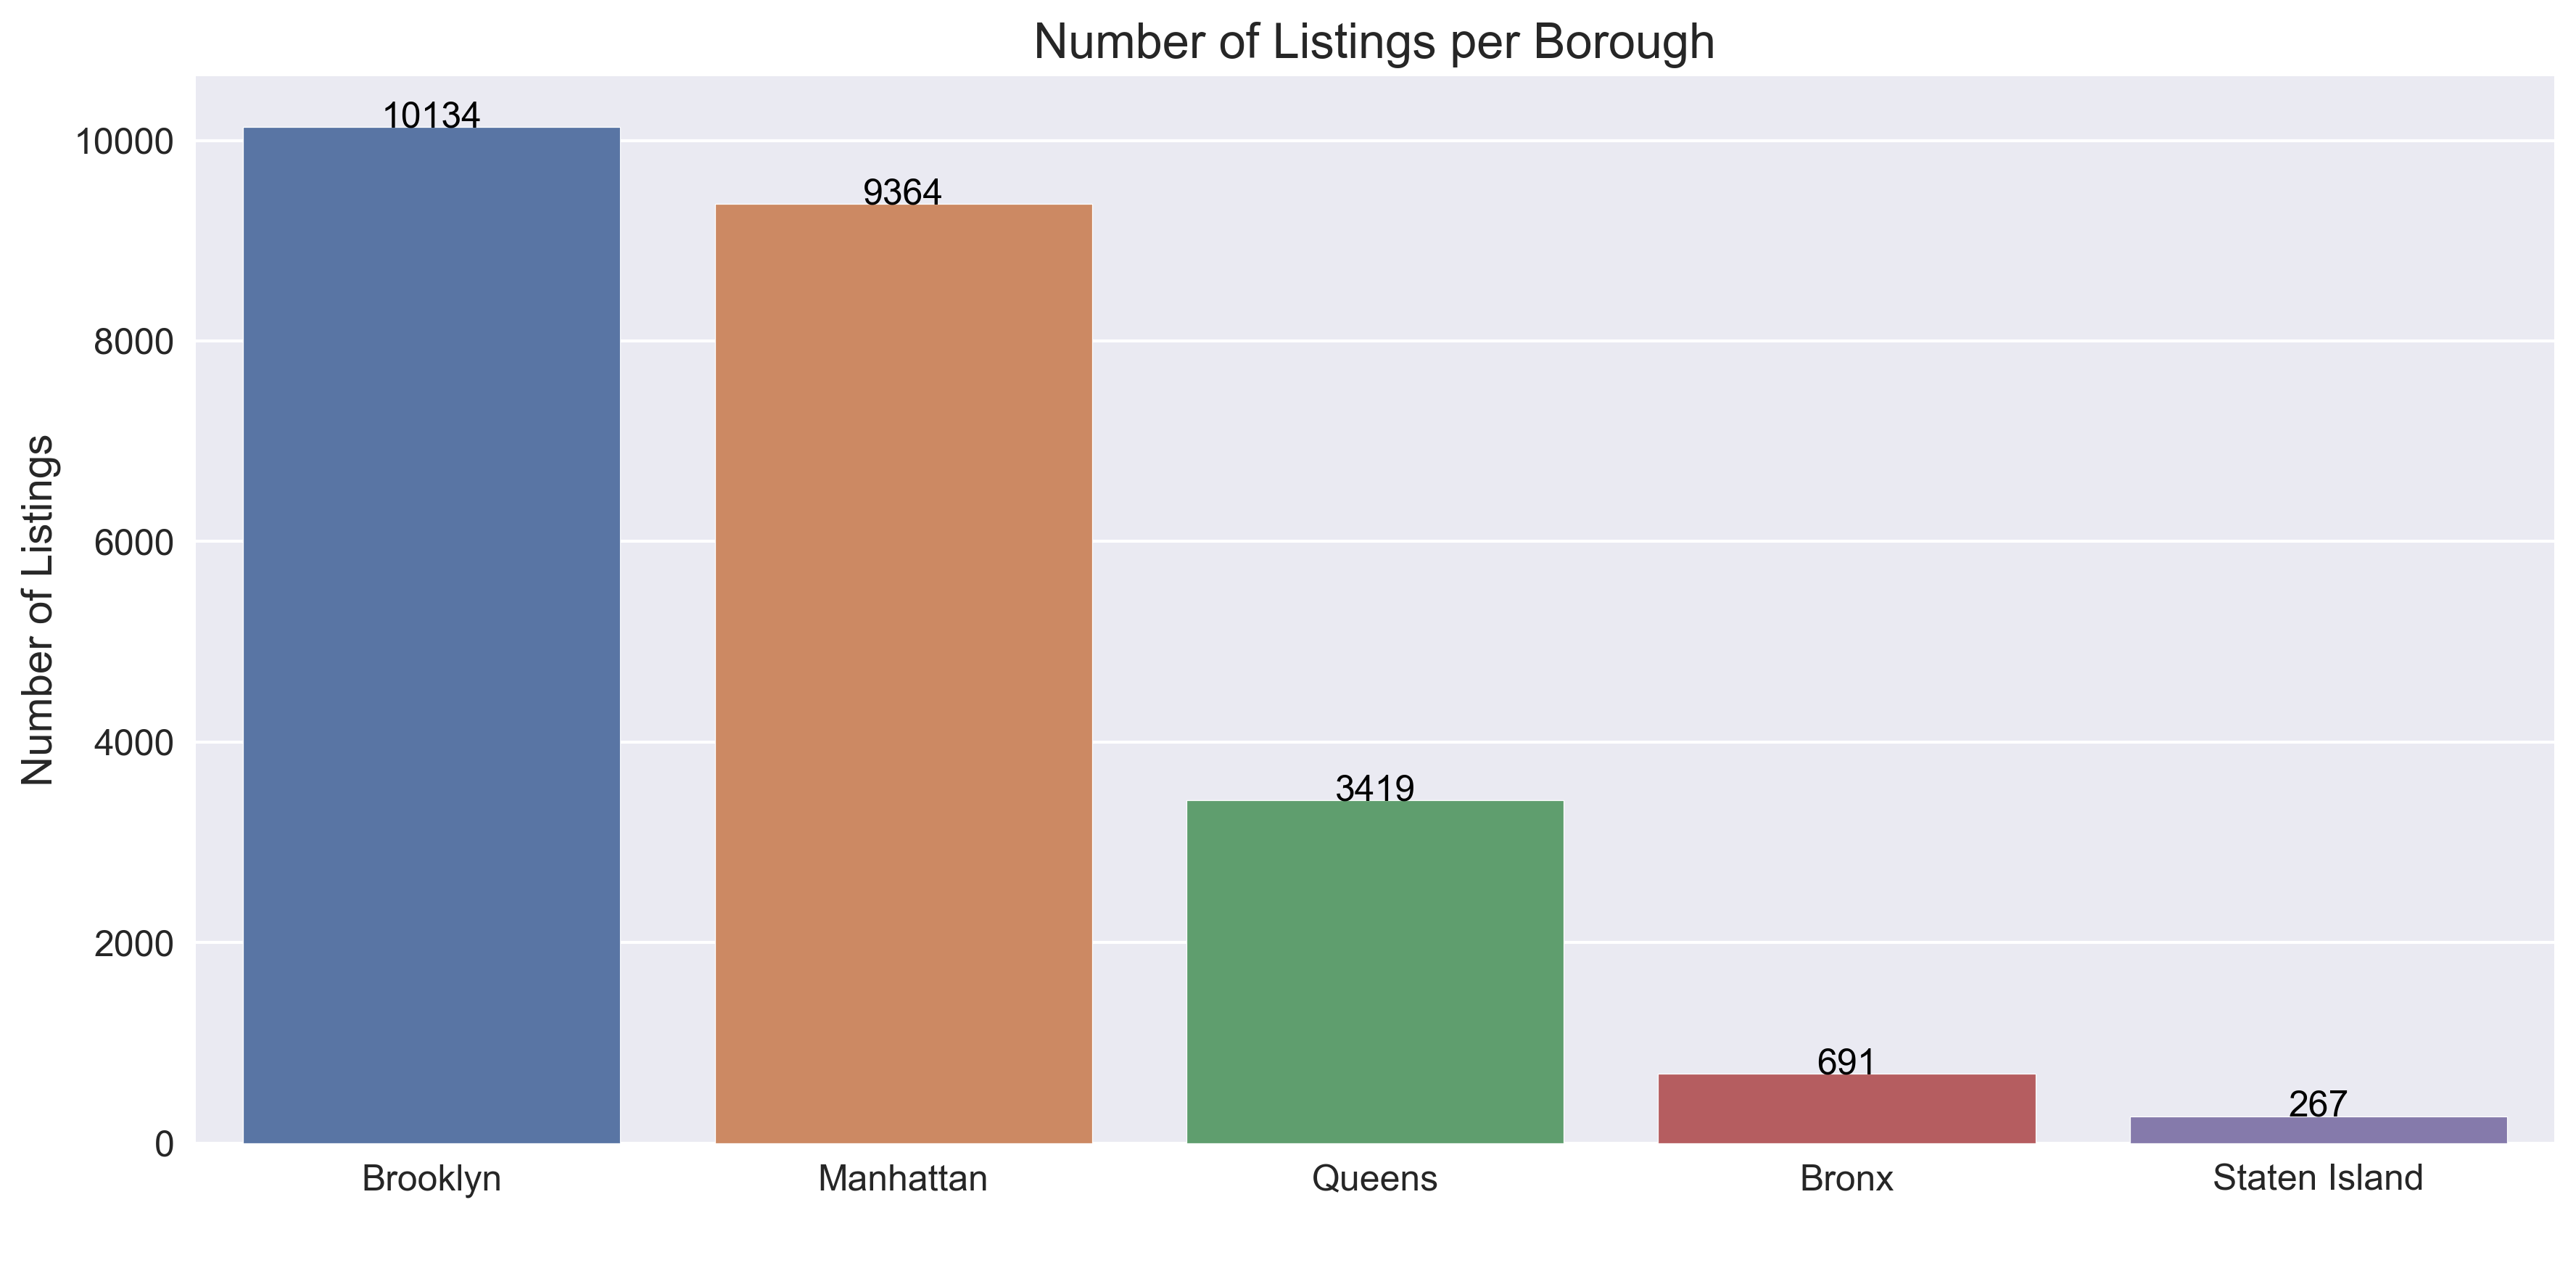

In [93]:
data = listings.borough.value_counts()
colors = sns.color_palette("deep")

ax = sns.barplot(x=data.index, y=data, hue=data.index, palette=colors)
plt.title('Number of Listings per Borough')
plt.xlabel(' ')
plt.ylabel('Number of Listings')

for i, v in enumerate(data):
    ax.text(i, v, str(v), color='black', ha='center')

plt.tight_layout();

## Room Type Distribution by Borough

In [94]:
room_type_by_borough = listings.groupby(['borough', 'room_type']).size().unstack(fill_value=0)
room_type_by_borough

room_type,entire home/apt,private room,shared room
borough,,,
Bronx,255,403,33
Brooklyn,5054,4893,187
Manhattan,5277,3838,249
Queens,1301,2006,112
Staten Island,133,132,2


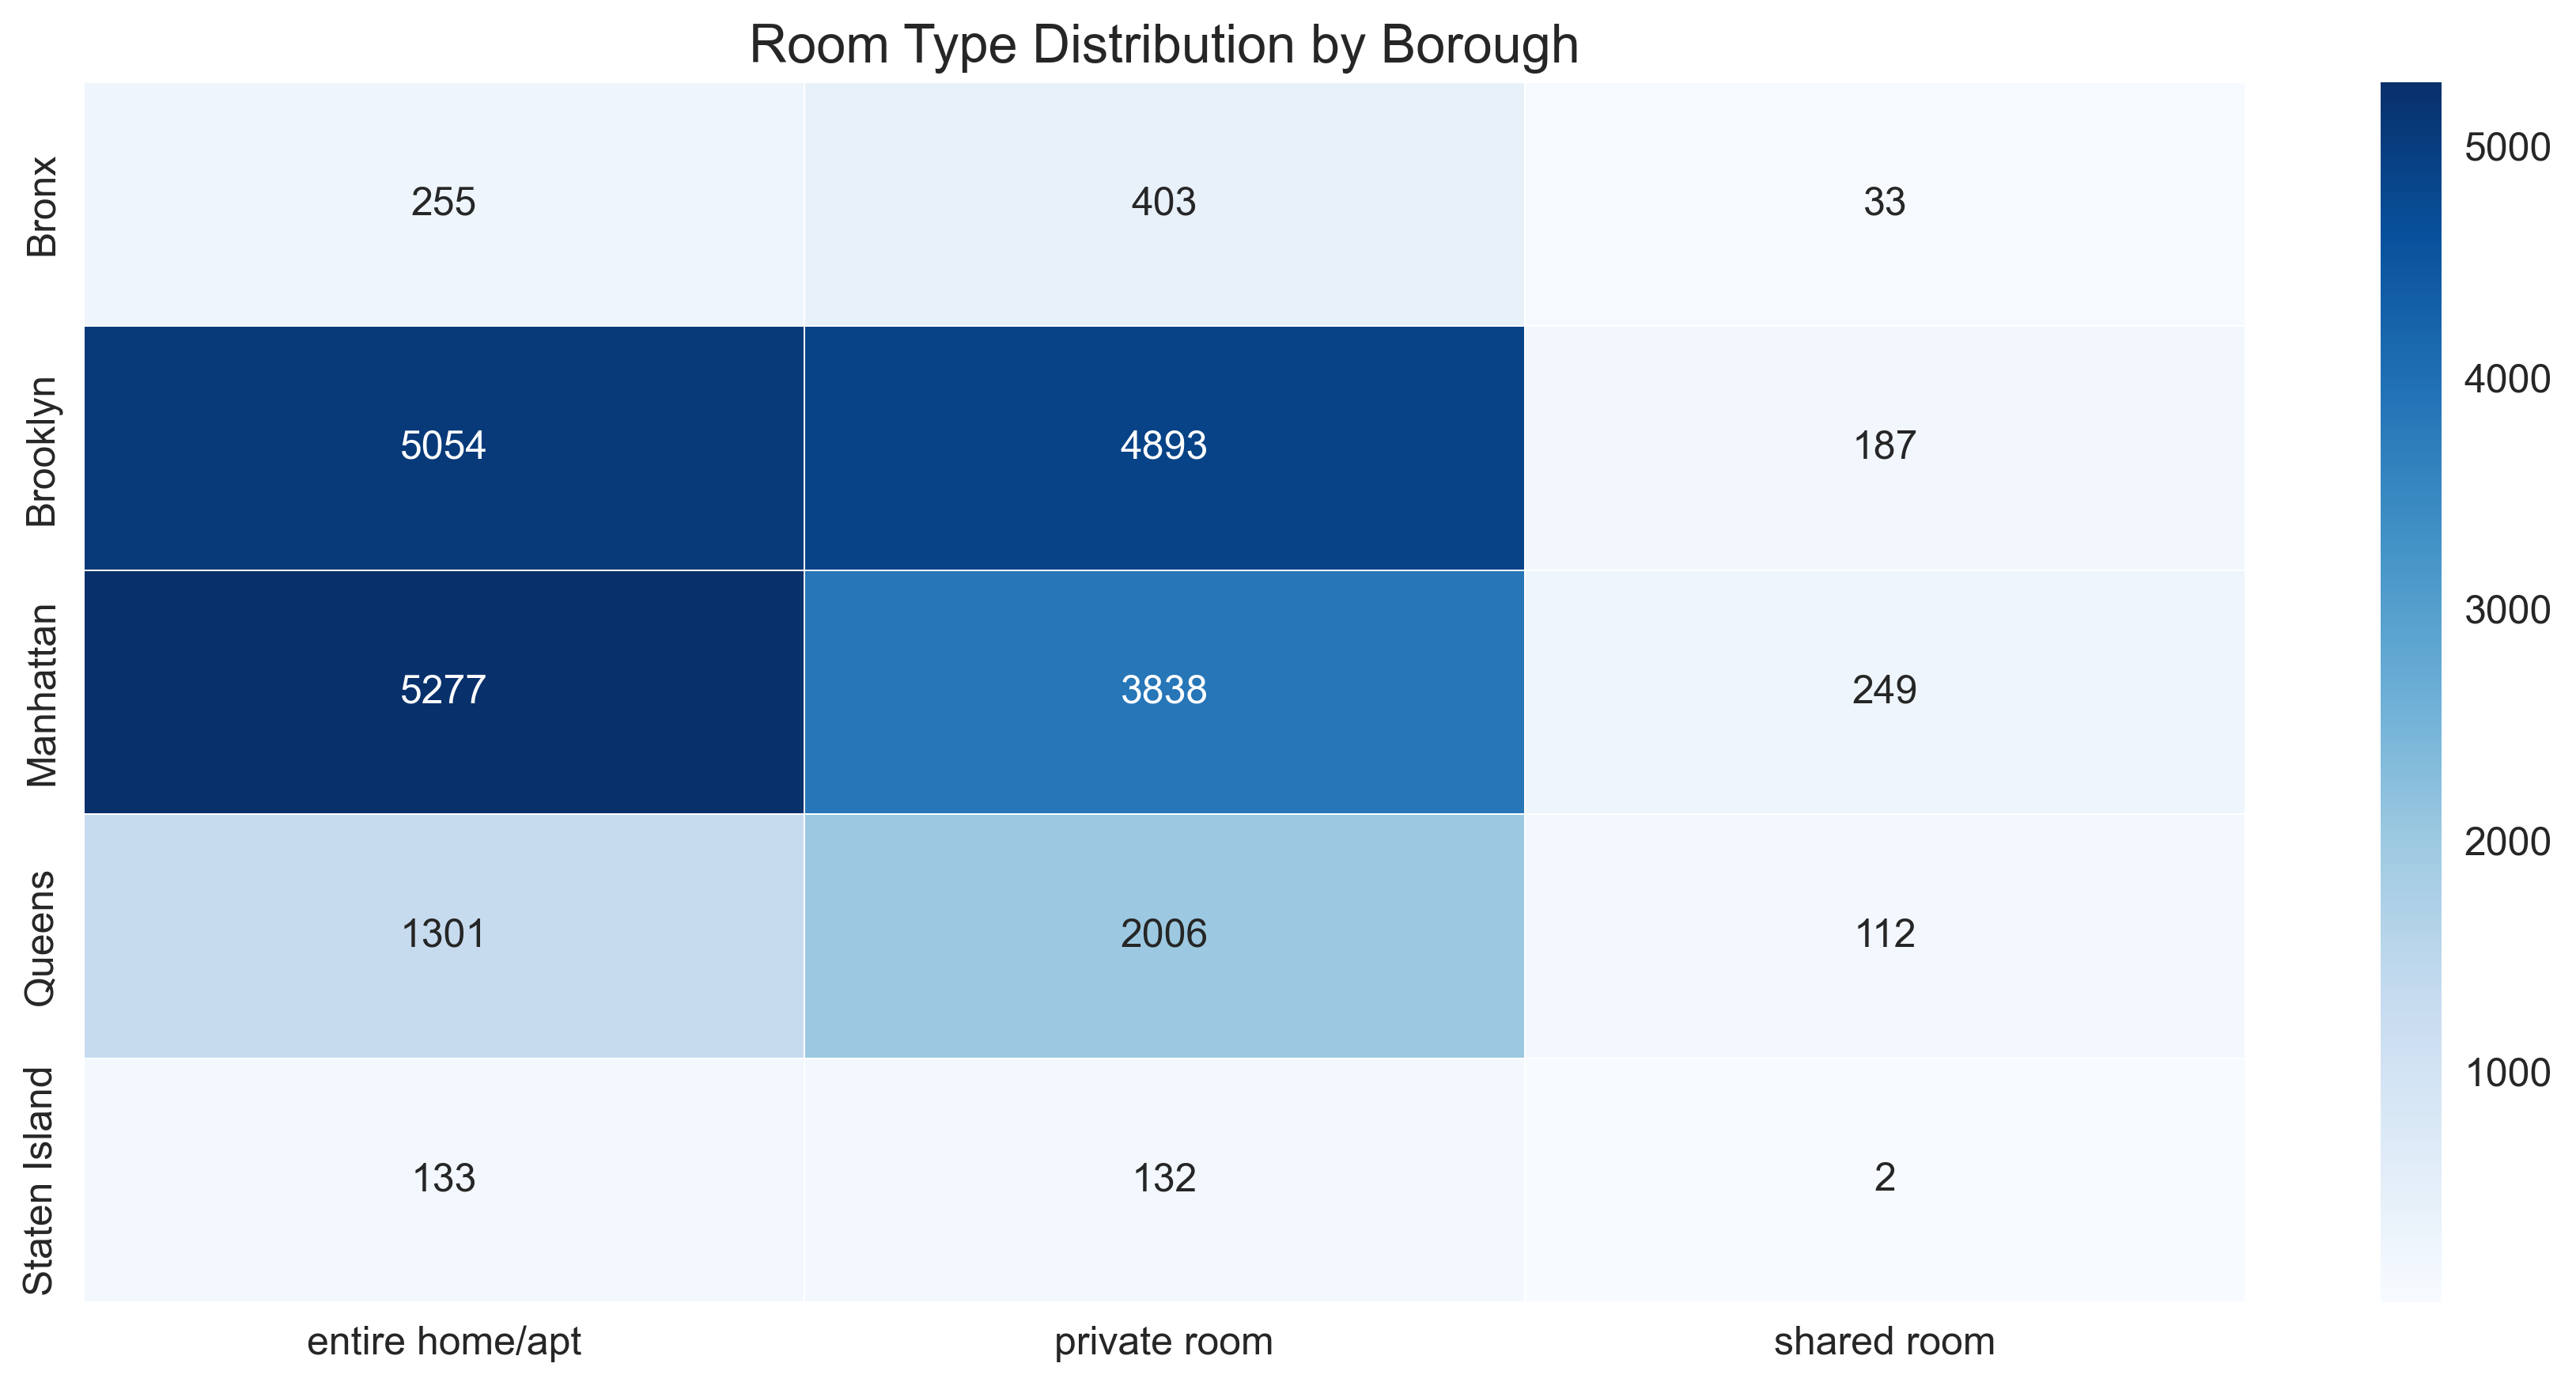

In [95]:
ax = sns.heatmap(data=room_type_by_borough, cmap='Blues',
                      annot=True, fmt=".0f", linewidths=0.1)

# Set the title and adjust font size
ax.set_title('Room Type Distribution by Borough')

# Customize axis labels
ax.set_xlabel('')
ax.set_ylabel('')
plt.tight_layout();

## Distribution of Borough and Room Types According to Prices

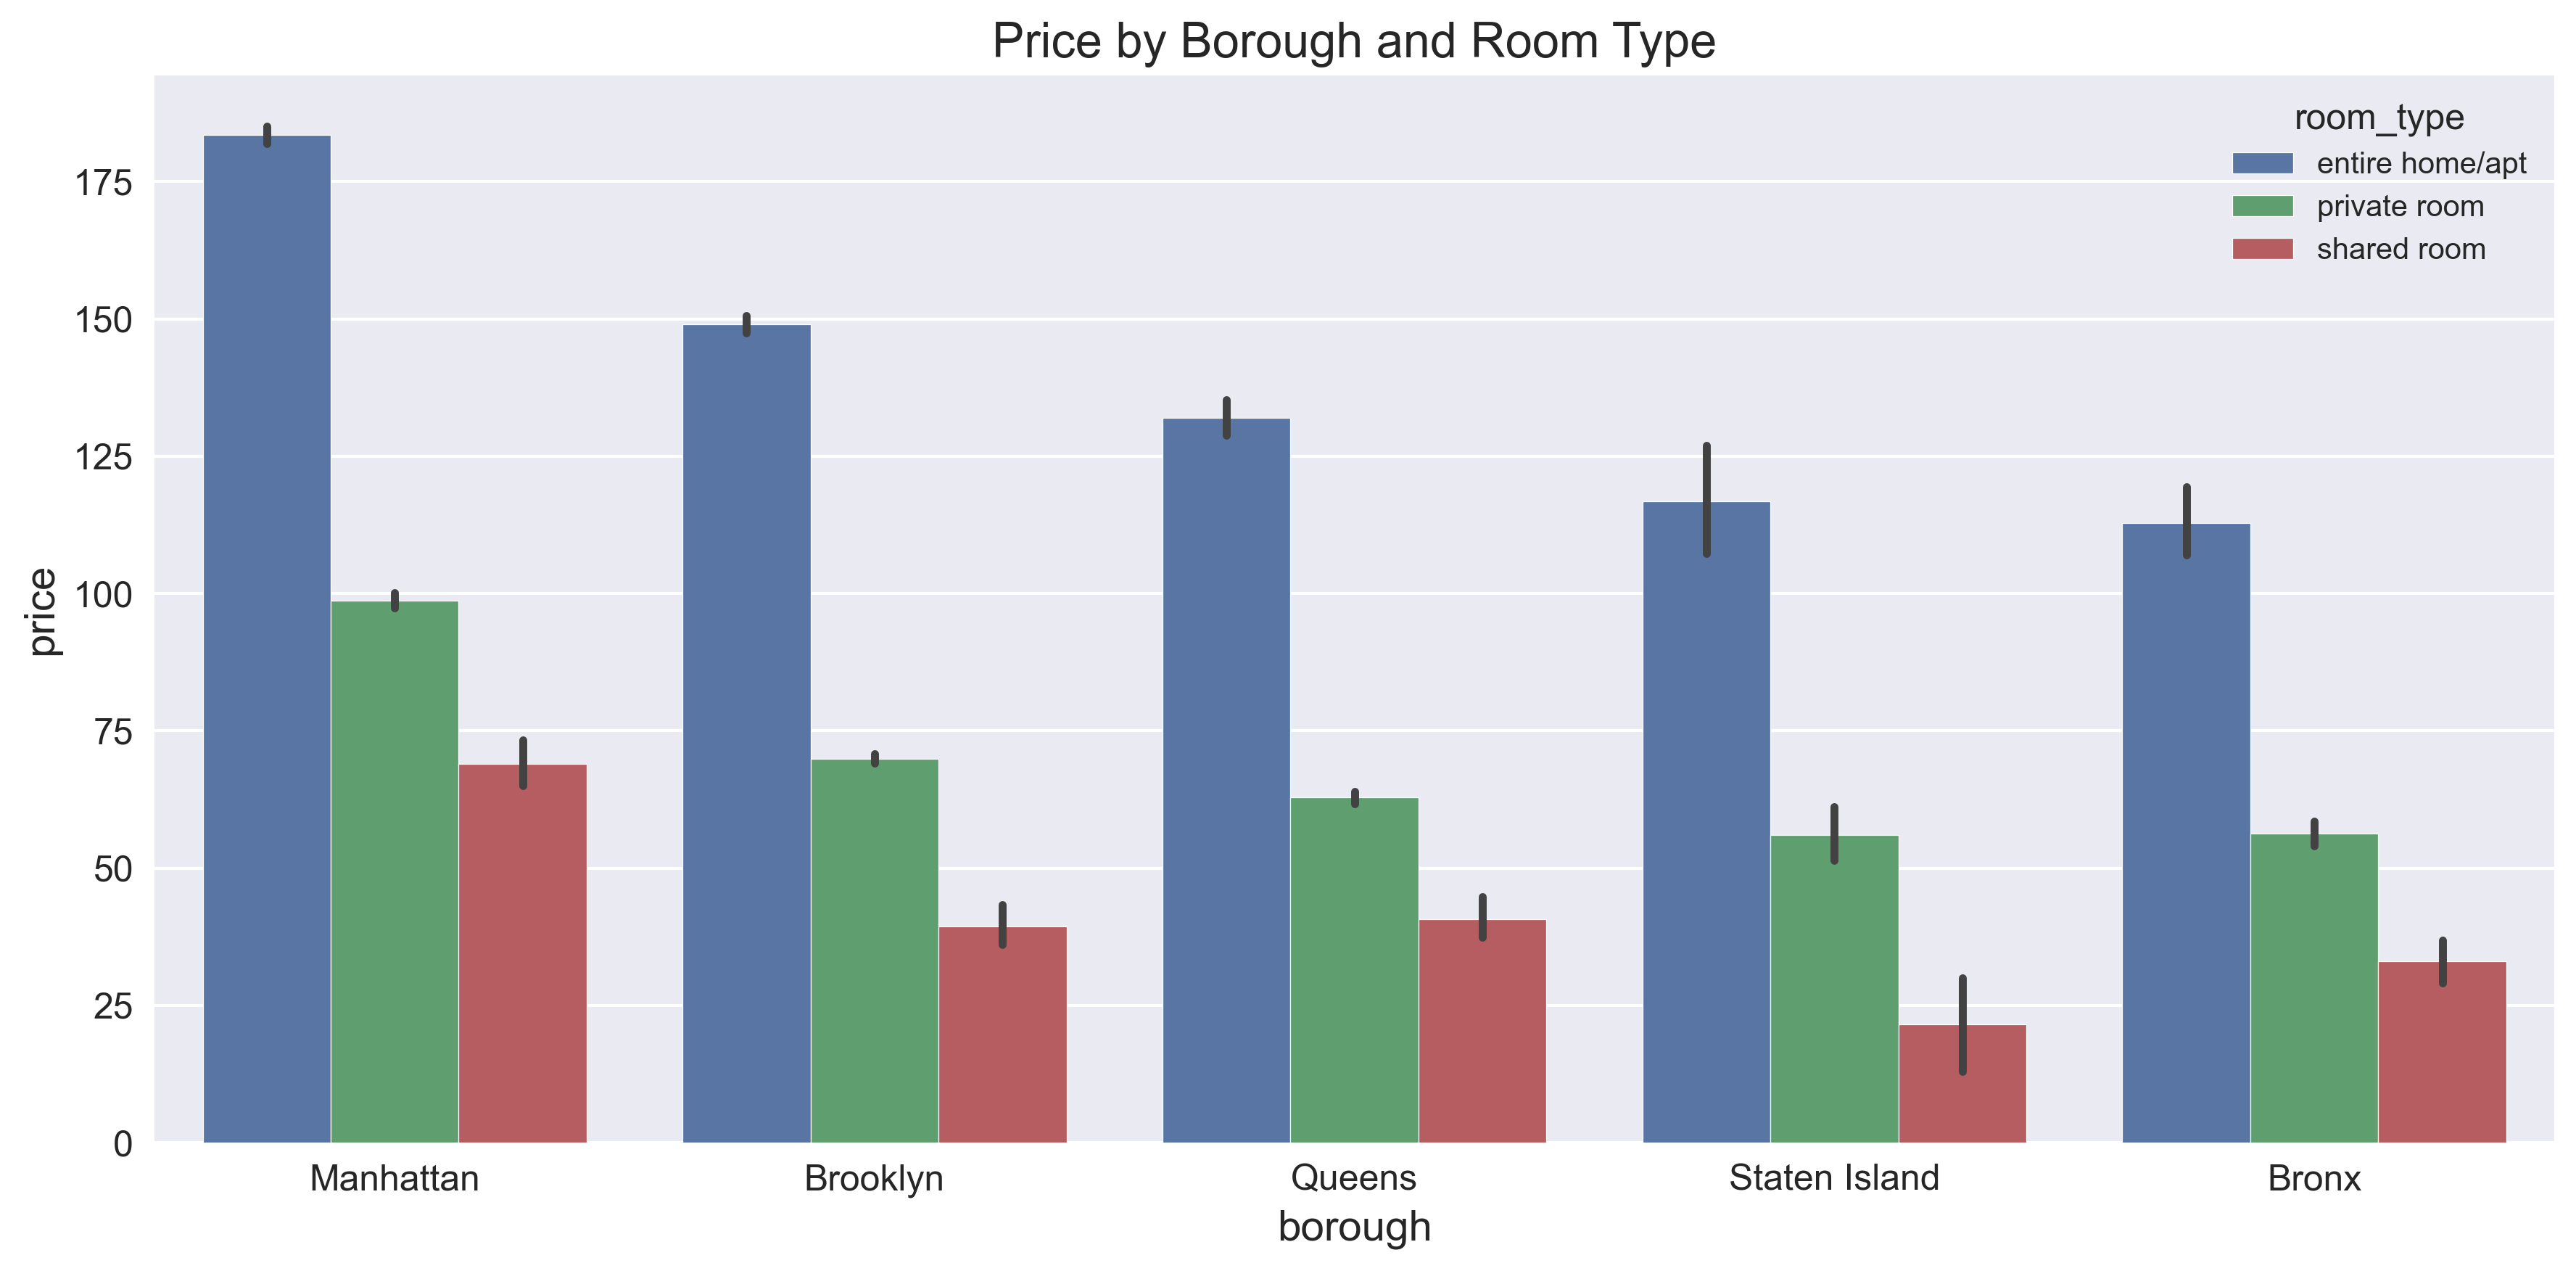

In [96]:
sns.barplot(x='borough', y='price', hue='room_type', data=listings).set(
    title='Price by Borough and Room Type')
plt.tight_layout();

## Host Reviews

In [97]:
# Group by 'host_name' and 'borough' and count the number of reviews
reviews_per_host = listings.groupby(['host_name'])[
    'last_review'].count().reset_index()

# Rename the columns for clarity
reviews_per_host.columns = ['host_name','number_of_reviews']

# Sort the DataFrame by 'number_of_reviews' in descending order
reviews_per_host_sorted = reviews_per_host.sort_values(
    by='number_of_reviews', ascending=False)

# print out the number of hosts
reviews_per_host_sorted.host_name.nunique()

7103

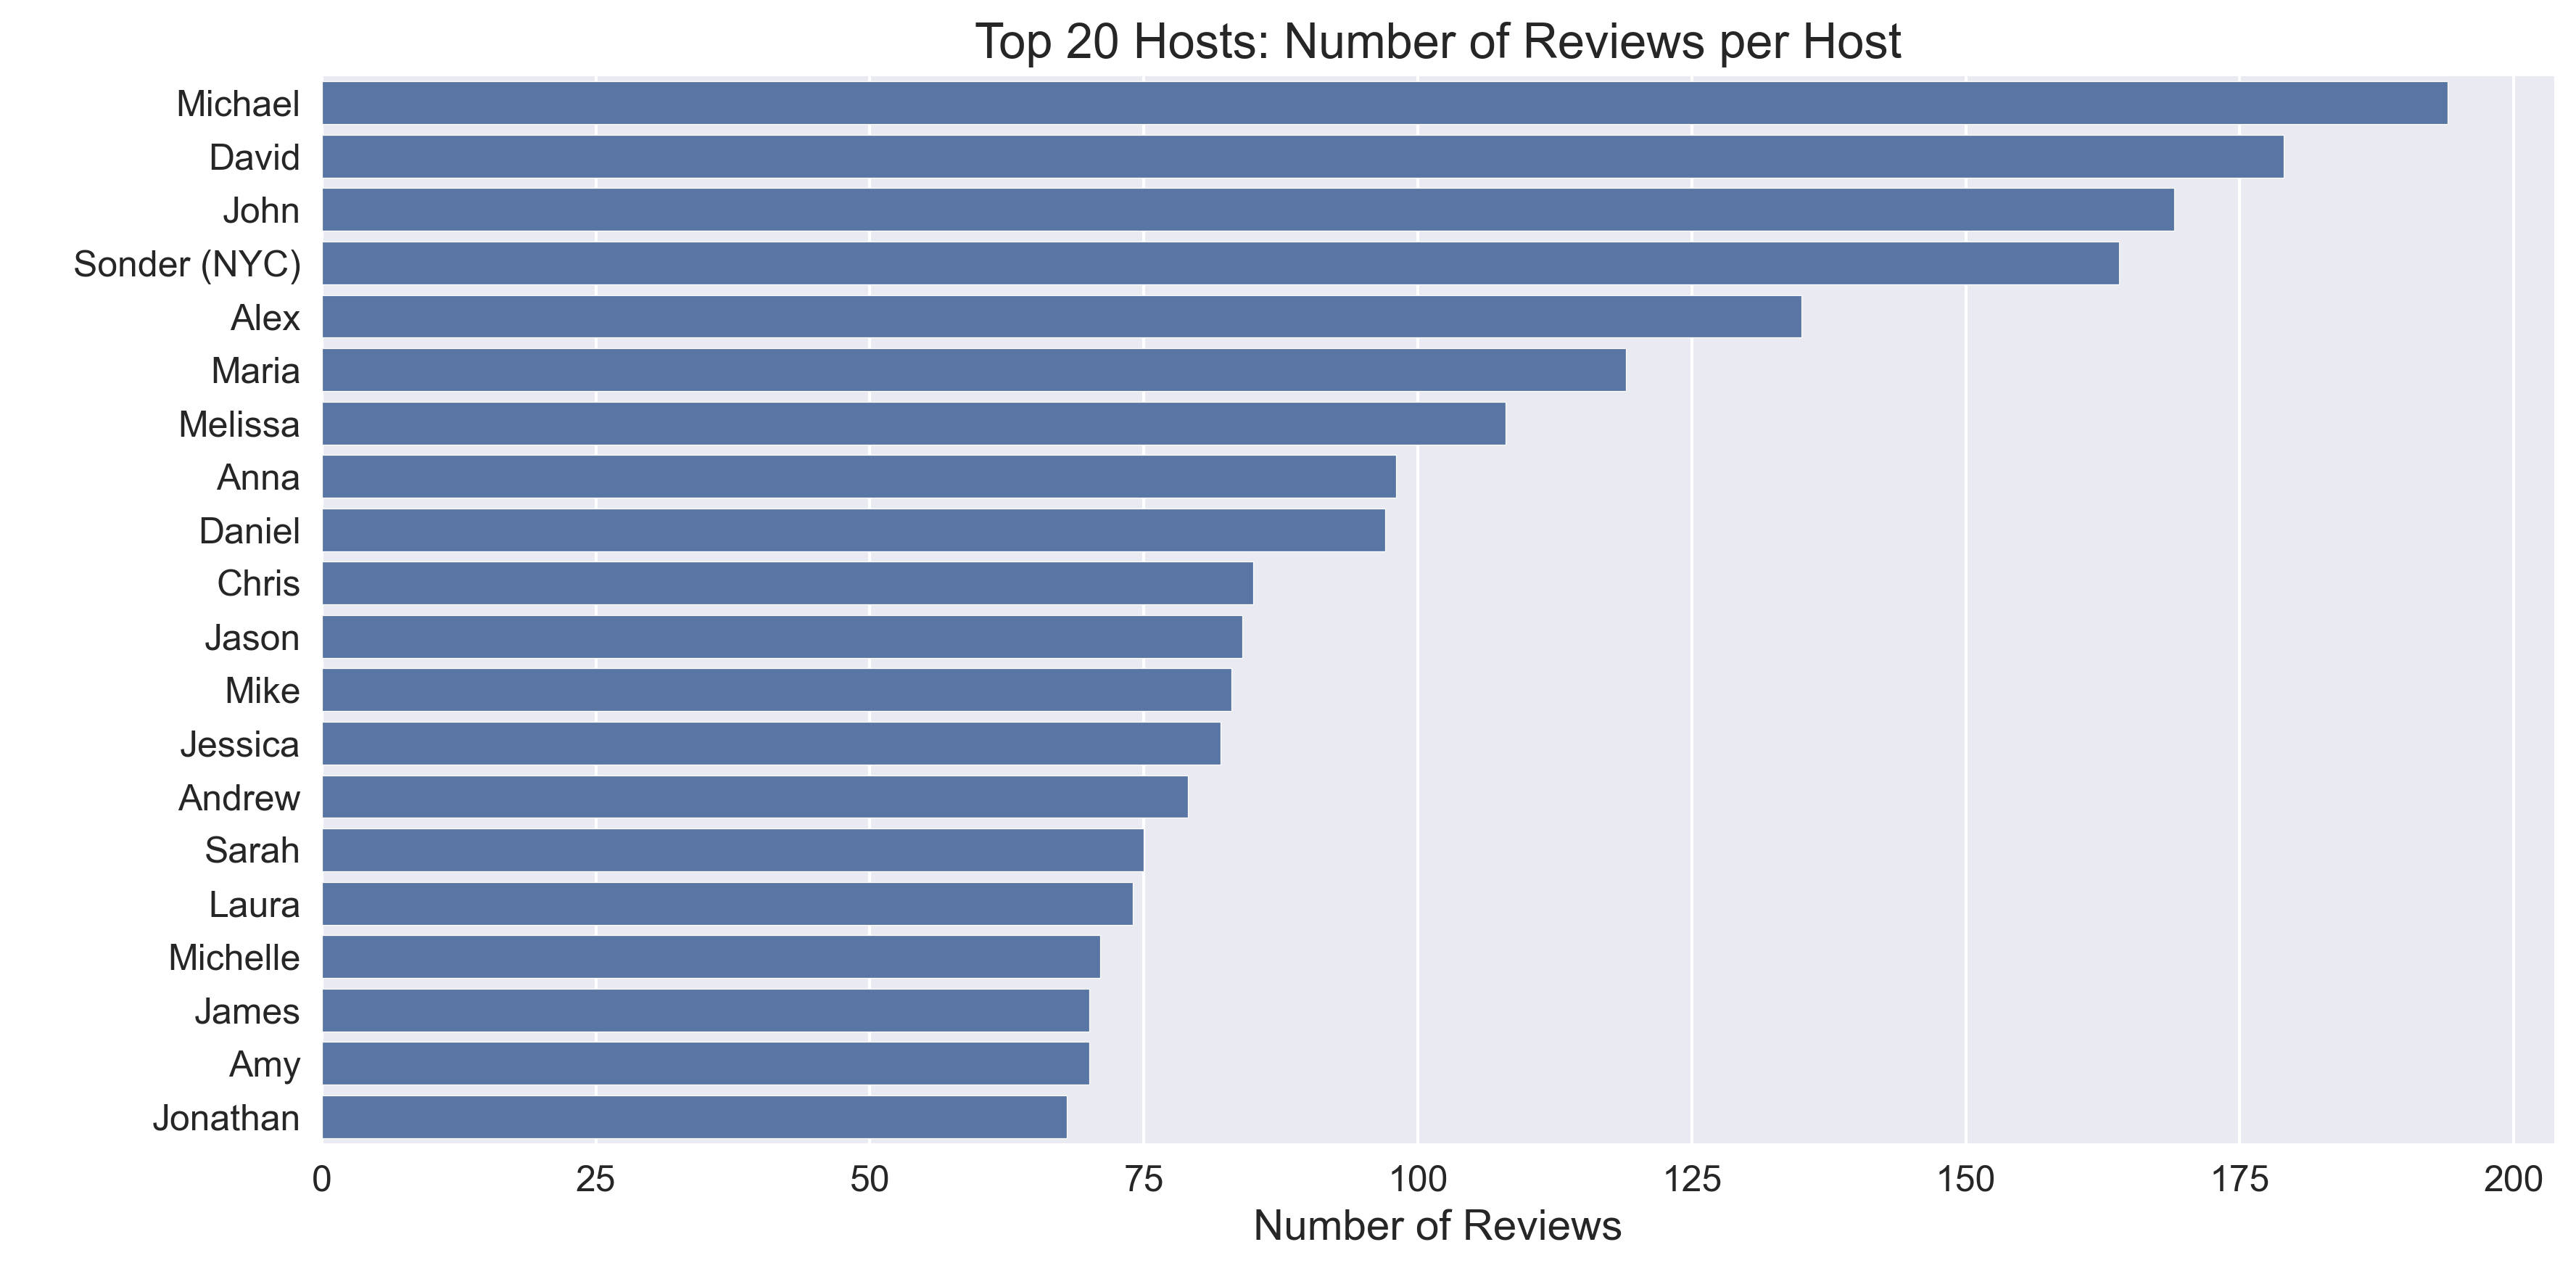

In [98]:
# Limit to the top 20 host names
top_20_hosts = reviews_per_host_sorted.head(20)
bar_plot = sns.barplot(x='number_of_reviews', y='host_name', data=top_20_hosts)

plt.title('Top 20 Hosts: Number of Reviews per Host')
plt.xlabel('Number of Reviews')
plt.ylabel(' ')
plt.tight_layout()

# Results

In Summary there are **23875** listings by **7103** hosts.

The total number of boroughs are 5, namely:
 - Manhattan
 - Brooklyn
 - Queens
 - Staten Island
 - Bronx

The room types available are 3:
 - Entire home or Apartment
 - Private rooms
 - Shared rooms

## 1. Host Reviews

### Host Reviews

Hosts play a crucial role in enhancing your stay. Opt for listings with consistently positive reviews and high ratings for a reliable and enjoyable experience.

## 2. Price vs. Neighborhood

### Airbnb Prices Across NYC Neighborhoods

Discover the optimal balance between budget, location and room type. While Manhattan is iconic, the analysis reveals that Brooklyn and Queens offer appealing options at more budget-friendly rates. Explore different neighborhoods to find hidden gems that match your preferences.

## 3. Room Availability by Neighborhood

### Room Availability in Each Borough

Discover the optimal periods for booking to ensure a smooth reservation process while securing your preferred room type and borough.

## How to Use This Guide

1. **Host Reviews:**
   - Look for listings with more reviews for a reliable stay (more reviews is assumed to be positive).

2. **Price vs. Neighborhood:**
   - Identify neighborhoods that align with your budget and preferences.
   - Consider Brooklyn and Queens as viable alternatives to Manhattan for more budget-friendly options.

3. **Room Availability:**
   - Choose the right time of booking based on neighborhood preferences.

## Conclusion

Whether you prioritize host reliability, budget considerations, or room availability, this guide equips you with the data needed to make informed decisions.
